In [1]:
# из библиотеки google.colab импортируем класс files при необходимости подгрузки файла с персонального компьютера
# from google.colab import files
# импортируем pandas - основную библиотеку аналитика данных
import pandas as pd
# импортируем библиотеку numpy для возможных расчетов
import numpy as np
# импортируем модуль json для распаковки структур данных формата json
import json
# импортируем статистические библиотеки
import scipy
import scipy.stats as stats
# импортируем модуль pyplot из библиотеки matplotlib для визуализации
from matplotlib import pyplot as plt
# импортируем библиотеку seaborn для визуализации
import seaborn as sns
# для регулярных выражений
import re as re

In [2]:
# установить размер графиков
sns.set(rc={'figure.figsize':(8,4)})

# **4. Modeling / Анализ данных**

**Этапы анализа:**
1. Определить целевые и факторные переменные.
2. Определить типы переменных.
3. Проанализировать каждый признак отдельно.
4. Проанализировать взаимосвязи признаков.
5. Проинтерпретировать результаты.

**Аналитические цели:**
1. Проанализировать распределение продаж по сети в разрезе категорий товаров, географии торговых точек, категорий покупателей.
2. Изучить целевую аудиторию и составить портреты пользователей в разрезе пола, возраста, географии, среднего чека.
3. Найти взаимосвязи между продажами и факторами (признаками), влияющими на рост выручки.

**Целевые переменные:**
* 'total' - выручка от продаж 
*  категории покупателей

**Определяем типы переменных по каждому признаку:**
1. Категориальные : gender (пол), product_category (категория товара), city (город), product_name (наименование товара), 
   <br>категориально-номинальные : product_id (id товара), outlet_id (id торговой точки), customer_id (id клиента). 
2. Количественные:
    <br>2.1. Дискретные : quantity (кол-во товаров в транзакции).
    <br>2.2. Непрерывные : unit_price (цена за ед товара), total (общая сумма транзакции (заказа)),   age (возраст).
3. Порядковые : transaction_id (id транзакции).

In [3]:
# загружаем обработанный и подготовленный файл для анализа (результат работы в 1-й части)
df_1 = pd.read_csv('coffee_shop_prepared.csv', index_col = 0)

In [4]:
# визуальный обзор датасета
df_1.head(5)

,transaction_id,quantity,unit_price,total,product_id,product_name,product_category,outlet_id,city,customer_id,gender,age
0,0,1,162.50,162.50,52,traditional blend chai rg,tea,3,санкт-петербург,558,женский,41
1,1,2,227.50,455.00,27,brazilian lg,coffee,3,санкт-петербург,781,не указан,33
2,2,2,162.50,325.00,46,serenity green tea rg,tea,3,санкт-петербург,788,не указан,29
3,3,2,162.50,325.00,23,our old time diner blend rg,coffee,3,санкт-петербург,683,женский,25
4,4,1,159.25,159.25,34,jamaican coffee river sm,coffee,3,санкт-петербург,99,мужской,57


## 4.1. Количественные признаки

### age (возраст)

In [5]:
age = df_1.age

In [6]:
max_value = age.max()
min_value = age.min()
mean_value = age.mean()
median_value = age.median()
print(f'Наибольший возраст: {max_value}', f'Наименьший возраст: {min_value}',
     f'Средний возраст: {mean_value}', f'Медианное значение возраста: {median_value}', sep = '\n')

Наибольший возраст: 74
Наименьший возраст: 23
Средний возраст: 45.74754546917753
Медианное значение возраста: 43.0


In [7]:
percentile_10_value = age.quantile(0.10)
percentile_25_value = age.quantile(0.25)
percentile_50_value = age.quantile(0.50)
percentile_75_value = age.quantile(0.75)
percentile_90_value = age.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 27.0
25-й процентиль: 32.0
50-й процентиль: 43.0
75-й процентиль: 59.0
90-й процентиль: 68.0


In [8]:
age.describe()

count    24852.000000
mean        45.747545
std         15.091661
min         23.000000
25%         32.000000
50%         43.000000
75%         59.000000
max         74.000000
Name: age, dtype: float64

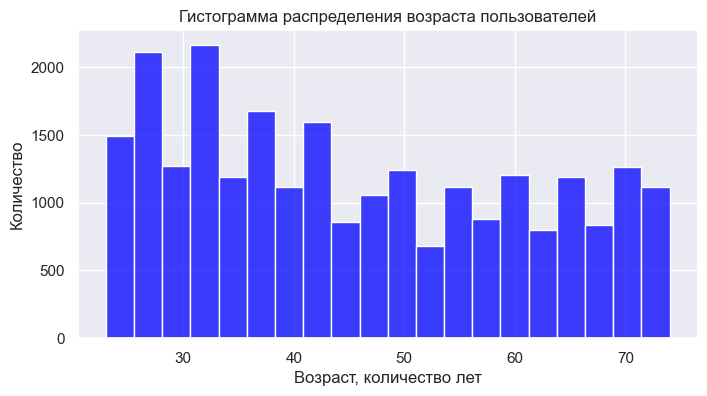

In [9]:
sns.histplot(age, bins=20, color='blue')
plt.title('Гистограмма распределения возраста пользователей')
plt.xlabel('Возраст, количество лет')
plt.ylabel('Количество')
plt.show()

In [10]:
# количество объектов, значения возраста по которым превышает 90 процентиль
len(df_1[df_1.age>percentile_90_value])

2373

In [11]:
# посмотрим на значение 99 процентиля
age.quantile(0.99)

74.0

In [12]:
# количество объектов, значения возраста по которым превышает 99 процентиль
len(df_1[df_1.age>age.quantile(0.99)])

0

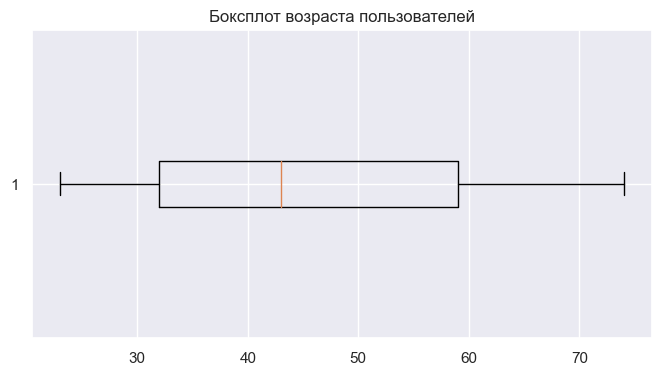

In [13]:
plt.boxplot(age, vert=False)
plt.title('Боксплот возраста пользователей')
plt.show()

In [14]:
# коэффициенты ассиметрии и эксцесса
skew = age.skew()
kurtosis = age.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 0.28079911169022514
Коэффициент эксцесса: -1.2071866113302654


In [15]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия д'Агастино
# т.к.кол-во наблюдений больше 5000:
stats.normaltest(df_1.age)

NormaltestResult(statistic=23741.71600516202, pvalue=0.0)

**Выводы:**
1. Минимальное значение возраста по исходной выборке - 23 года, максимальное - 74 года. Размах значений составил 51 год. В процессе анализа данных не было выявлено наличия выбросов. Скорее всего, все значения, указанные в данном признаке, являются реальными. Возраст 99% пользователей не превышает 74 лет, т.е. максимального значения выборки. Кол-во значений за пределами 99 процентиля - 0 человек. Среднее значение составило примерно 46 лет, а медианное - 43 года. Значения практически равны.
2. Возраст 25% пользователей не превышает 32 лет, а 75% пользователей - 59 лет, что свидетельствует о том, что услугами данной сети пользуются, в основном, молодежь и люди среднего возраста (по российским стандартам).
3. На гистограмме видно, что распределение признака отлично от нормального. Возраст в диапазоне после 43 лет (медиана) немного "проседает". Возможно, целесообразно разделить возраст на несколько категорий (например, до 44 лет - молодежь, 45-59 лет - средний возраст, 59-74 лет - пожилой возраст, согласно российской возрастной периодизации взрослого населения), которые в дальнейшем проанализировать отдельно. Боксплот показывает наличие небольшого правого "хвоста", что также свидетельствует об отличии распределения признака от нормального.
4. Коэффициент ассиметрии равен 0.28, что так же свидетельствует об умеренной скошенности вправо. Коэффициент эксцесса отрицательный, что говорит о более плоской (низкой) вершине (по сравнению с вершиной нормального рапределения) и "тяжелых хвостах". По проведенному тесту на нормальность распределения p-value меньше уровня значимости 0,05, поэтому гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

### unit_price (цена за ед товара)

In [16]:
price = df_1.unit_price

In [17]:
max_value = price.max()
min_value = price.min()
mean_value = price.mean()
median_value = price.median()
print(f'Наибольшая цена товара: {max_value}', f'Наименьшая цена товара: {min_value}',
     f'Средняя цена товара по всей выборке: {mean_value}', f'Медианное значение цены товар по всей выборке: {median_value}', sep = '\n')

Наибольшая цена товара: 2925.0
Наименьшая цена товара: 52.0
Средняя цена товара по всей выборке: 215.3455335586673
Медианное значение цены товар по всей выборке: 195.0


### total (общая сумма транзакции (заказа, чека))

In [18]:
total = df_1.total

In [19]:
max_value = total.max()
min_value = total.min()
mean_value = total.mean()
median_value = total.median()
print(f'Наибольший чек: {max_value}', f'Наименьший чек: {min_value}',
     f'Средний чек по всей выборке: {mean_value}', f'Медианное значение чека: {median_value}', sep = '\n')

Наибольший чек: 23400.0
Наименьший чек: 52.0
Средний чек по всей выборке: 299.6138017061001
Медианное значение чека: 243.75


In [20]:
percentile_10_value = total.quantile(0.10)
percentile_25_value = total.quantile(0.25)
percentile_50_value = total.quantile(0.50)
percentile_75_value = total.quantile(0.75)
percentile_90_value = total.quantile(0.90)
percentile_99_value = total.quantile(0.99)
percentile_99_9_value = total.quantile(0.999)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}',
      f'99-й процентиль: {percentile_99_value}',
      f'99.9-й процентиль: {percentile_99_9_value}',sep='\n')

10-й процентиль: 162.5
25-й процентиль: 195.0
50-й процентиль: 243.75
75-й процентиль: 390.0
90-й процентиль: 487.5
99-й процентиль: 910.0
99.9-й процентиль: 1820.0


In [21]:
# количество наблюдений (заказов, чеков), значения которых превышает 90 процентиль
len(df_1[df_1.total>percentile_90_value])

1886

In [22]:
# количество наблюдений (заказов, чеков), значения которых превышает 99.9 процентиль
len(df_1[df_1.total>total.quantile(0.999)])

24

In [23]:
# рассмотрим чеки, значения которых превышают 99.9 процентиль
df_1[df_1.total>total.quantile(0.999)].sort_values(by='total', ascending=False).head(24)


,transaction_id,quantity,unit_price,total,product_id,product_name,product_category,outlet_id,city,customer_id,gender,age
17743,28980,8,2925.0,23400.0,8,civet cat,coffee beans,8,москва,8311,женский,57
10725,11681,1,2925.0,2925.0,8,civet cat,coffee beans,3,санкт-петербург,130,мужской,52
15571,21322,1,2925.0,2925.0,8,civet cat,coffee beans,8,москва,8227,мужской,72
22597,44584,1,2925.0,2925.0,8,civet cat,coffee beans,8,москва,8267,мужской,39
20840,39373,1,2925.0,2925.0,8,civet cat,coffee beans,8,москва,8289,мужской,26
20098,37149,1,2925.0,2925.0,8,civet cat,coffee beans,5,москва,5091,не указан,44
19834,36216,1,2925.0,2925.0,8,civet cat,coffee beans,8,москва,8365,мужской,52
19796,35975,1,2925.0,2925.0,8,civet cat,coffee beans,8,москва,8006,женский,32
19275,34753,1,2925.0,2925.0,8,civet cat,coffee beans,8,москва,8048,не указан,28
18912,33424,1,2925.0,2925.0,8,civet cat,coffee beans,3,санкт-петербург,28,мужской,70


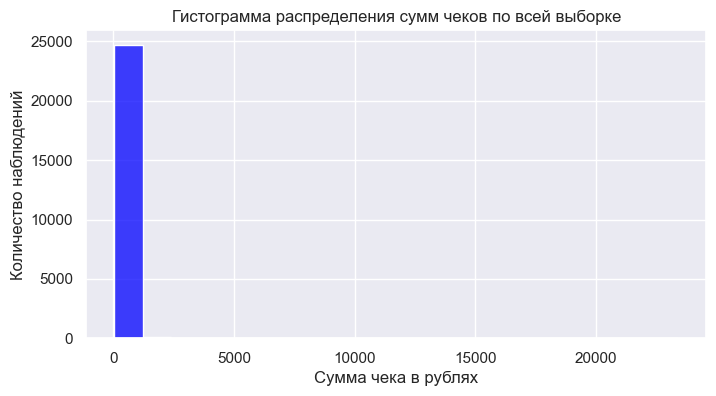

In [24]:
sns.histplot(total, bins=20, color='blue')
plt.title('Гистограмма распределения сумм чеков по всей выборке')
plt.xlabel('Сумма чека в рублях')
plt.ylabel('Количество наблюдений')
plt.show()

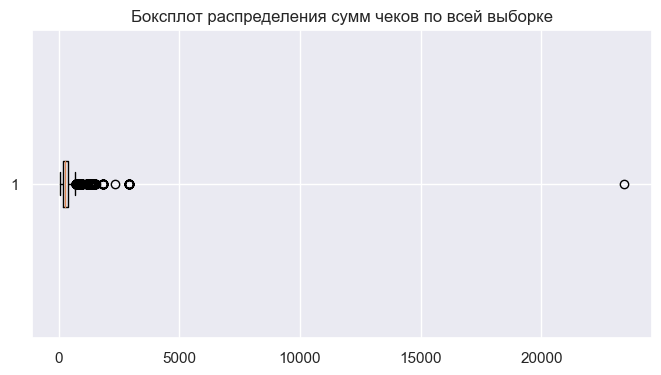

In [25]:
plt.boxplot(total, vert=False)
plt.title('Боксплот распределения сумм чеков по всей выборке')
plt.show()

In [26]:
# коэффициенты ассиметрии и эксцесса
skew = total.skew()
kurtosis = total.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 42.78939877061505
Коэффициент эксцесса: 4078.4805867241903


In [27]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия д'Агастино
# т.к.кол-во наблюдений больше 5000:
stats.normaltest(df_1.total)

NormaltestResult(statistic=74251.95475429966, pvalue=0.0)

**Выводы:**
1. Минимальная сумма чека в исходной выборке - 52 руб, максимальная сумма - 23 400 руб. Размах значений составил 23 348 руб. Среднее значение чека по всей выборке составило 300 руб, а медианное - 244 руб. Смещение среднего значения вправо от медианы свидетельствует о большом "правом" хвосте распределения.
2. 25% значений не превышает 195 руб, а 75% значений - 390 руб, что свидетельствует о наличии большого количества чеков с небольшими суммами и малого количества чеков с большими суммами.
3. На гистограмме видно, что распределение признака отлично от нормального. Чеки в диапазоне после среднего значения сильно "проседают". Боксплот также показывает наличие большого правого "хвоста", что также свидетельствует об отличии распределения от нормального. 
4. Поскольку все значения в данном признаке реальны, подтверждены реальными id_транзакциями, не являются ошибками или выбросами, их удаление считается нецелесообразным. 
5. Коэффициент ассиметрии намного больше 1, что так же свидетельствует о сильной скошенности вправо. Коэффициент эксцесса много больше 1, что говорит о большой сосредоточенности значений вокруг среднего, т.е. о более острой, высокой вершине, по сравнению с вершиной нормального распределения. По проведенному тесту на нормальность распределения p-value меньше уровня значимости 0,05, поэтому гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

## 4.2. Категориальные признаки

### gender (пол)

In [28]:
# кол-во покупок (транзакций) по категориям пола
gender = df_1.gender
gender.value_counts()

gender
женский      10851
мужской       8222
не указан     5779
Name: count, dtype: int64

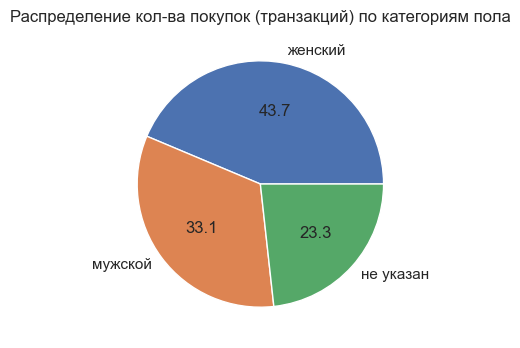

In [29]:
plt.pie(gender.value_counts(), labels = gender.value_counts().index, autopct='%.1f')
plt.title('Распределение кол-ва покупок (транзакций) по категориям пола')
plt.show()

Проверим каждую из трех групп ("женский", "мужской", "не указан") на уникальность значений по признаку customer_id, чтобы понять, есть ли возможность заменить часть значений в группе "не указан" на "женский" или "мужской"

In [30]:
female_cnt = df_1[df_1['gender'] == 'женский']['customer_id'].nunique()
male_cnt = df_1[df_1['gender'] == 'мужской']['customer_id'].nunique() 
not_specified_cnt = df_1[df_1['gender'] == 'не указан']['customer_id'].nunique() 

print(f'кол-во уникальных клиентов женского пола - {female_cnt}')  
print(f'кол-во уникальных клиентов мужского пола - {male_cnt}')    
print(f'кол-во уникальных клиентов с меткой "не указан" - {not_specified_cnt}')  
print(f'кол-во всех уникальных клиентов в датасете - {df_1.customer_id.nunique()}')

кол-во уникальных клиентов женского пола - 976
кол-во уникальных клиентов мужского пола - 726
кол-во уникальных клиентов с меткой "не указан" - 543
кол-во всех уникальных клиентов в датасете - 2245


In [31]:
# создадим три списка уникальных значений customer_id по каждой из трех категорий
female_cnt = df_1[df_1['gender'] == 'женский']['customer_id'].unique()
male_cnt = df_1[df_1['gender'] == 'мужской']['customer_id'].unique() 
not_specified_cnt = df_1[df_1['gender'] == 'не указан']['customer_id'].unique() 

In [32]:
# поиск возможных одинаковых customer_id в трех разных группах:
c = list(set(female_cnt) & set(not_specified_cnt))
d = list(set(male_cnt) & set(not_specified_cnt))
print(c, d) # списки пусты, пересекающихся значений customer_id нет. 
# В каждой из трех групп содержатся только уникальные customer_id           

[] []


**Выводы:**
1. Кол-во уникальных значений признака gender три : женщины, мужчины, не указан. Внутри каждой категории уникальных клиентов: женщины - 976 чел., мужчины - 726 чел., не указан - 543 чел.
2. Обращаем внимание, что у большого кол-ва - 543 чел. (24.2% от общего кол-ва уникальных пользователей), которые совершили 5 779 (23.3%) покупок  - не указан пол.
3. Проверка уникальных клиентов в каждой группе (мужской, женский, не указан) показала отсутствие общих значений между группами, поэтому мы не можем заменить какие-то значения в группе "не указан" на известные "женский" или "мужской"

 ### product_category (категория товара)

In [33]:
pr_cat = df_1.product_category
pr_cat.value_counts()

product_category
coffee                9948
tea                   7866
bakery                3780
drinking chocolate    1955
flavours               782
coffee beans           217
loose tea              155
branded                 82
packaged chocolate      67
Name: count, dtype: int64

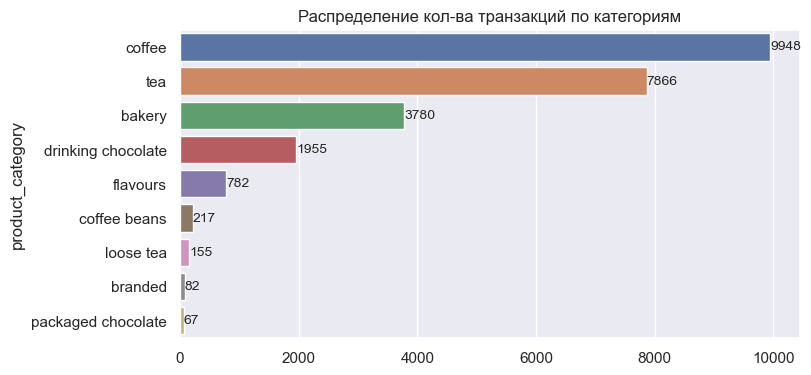

In [34]:
ax = sns.barplot(y=pr_cat.value_counts().index, x=pr_cat.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение кол-ва транзакций по категориям')
plt.show()

**Выводы:**
1. Кол-во уникальных значений в признаке product_category  =  9 : самая высокочастотная категория - coffee, самая низкочастотная категория - packeged chocolate.


 ### product_name (наименование товара)

In [35]:
pr_name = df_1.product_name
print(pr_name.value_counts())

product_name
morning sunrise chai rg         521
columbian medium roast rg       516
sustainably grown organic lg    516
latte                           516
traditional blend chai rg       515
                               ... 
chili mayan                      17
espresso roast                   17
earl grey                        15
peppermint                       14
spicy eye opener chai            13
Name: count, Length: 80, dtype: int64


In [36]:
print(len(df_1.product_name.unique()))

80


**Выводы:**
1. Кол-во уникальных значений в признаке product_name  = 80 : самый высокочастотный товар - morning sunrise chai rg, самый низкочастотный товар - spicy eye opener chai.

 ### city (город)

In [37]:
city = df_1.city
city.value_counts()

city
москва             16259
санкт-петербург     8593
Name: count, dtype: int64

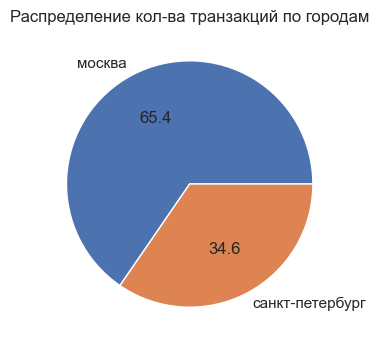

In [38]:
plt.pie(city.value_counts(), labels = city.value_counts().index, autopct='%.1f')
plt.title('Распределение кол-ва транзакций по городам')
plt.show()

**Выводы:**
1. Кол-во уникальных значений признака city два : Москва - 16 259 набл. (65.4%), СПб - 8 593 набл. (34.6%).

### 4.2.1. Категориально-номинальные признаки

 ### customer_id (id клиента)

In [39]:
print(f'общее кол-во наблюдений в признаке customer_id - {df_1.customer_id.count()}')
print(f'кол-во уникальных клиентов в датасете - {df_1.customer_id.nunique()}')

общее кол-во наблюдений в признаке customer_id - 24852
кол-во уникальных клиентов в датасете - 2245


### outlet_id (id торговой точки)

In [40]:
df_outlet = df_1.groupby(['city', 'outlet_id'])['transaction_id'].count()
df_outlet

city             outlet_id
москва           5            8545
                 8            7714
санкт-петербург  3            8593
Name: transaction_id, dtype: int64

**Выводы:**
1. В сети три уникальных торговых точки, две из них в Москве, одна в СПб. Кол-во транзакций распределено между торговыми точками примерно одинаково. 

## 4.3 Статистический анализ

### 4.3.1. Распределение выручки (объема продаж) в разрезе категорий товаров

In [41]:
df_prod_cat = df_1.groupby('product_category', as_index = False)['total'].sum().sort_values(by = 'total', ascending = False)
df_prod_cat['percent'] = round(df_prod_cat['total'] / df_prod_cat['total'].sum() * 100, 2)
df_prod_cat

,product_category,total,percent
2,coffee,2962352.25,39.78
8,tea,2190841.25,29.42
0,bakery,889266.30,11.94
4,drinking chocolate,796363.75,10.70
3,coffee beans,315695.25,4.24
1,branded,96590.00,1.30
6,loose tea,92985.75,1.25
5,flavours,64116.00,0.86
7,packaged chocolate,37791.65,0.51


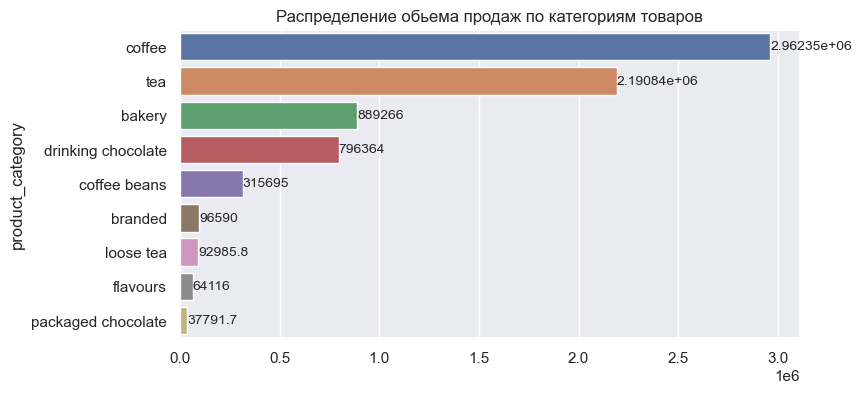

In [42]:
ax = sns.barplot(y=df_prod_cat['product_category'].value_counts().index, x=df_prod_cat['total'].values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение обьема продаж по категориям товаров')
plt.show()

**Выводы:**
1. Всего в признаке product_category 9 уникальных категорий товара. Выручка по ним распределяются неравномерно.
2. Две лидирующие категории - coffee и tea составляют 69 % от общего обьема продаж .
3. В топ-4 с большим отрывом входят : coffee, tea, bakery, drinking chocolate. 
4. Аутсайдерами являются категории favours - 0.86% и packaged chocolate - 0.51%.

### 4.3.2. Распределение выручки (объема продаж) в разрезе наименований товаров

In [43]:
df_prod_name = df_1.groupby(['product_category', 'product_name'], as_index = False)['total'].sum().sort_values(by = 'total', ascending = False)
df_prod_name['percent'] = round(df_prod_name['total'] / df_prod_name['total'].sum() * 100, 2)
df_prod_name[:10] # Топ-10 товаров, собравших наибольшую выручку 

,product_category,product_name,total,percent
47,drinking chocolate,sustainably grown organic lg,237428.75,3.19
45,drinking chocolate,dark chocolate lg,225810.00,3.03
30,coffee,latte rg,195861.25,2.63
70,tea,morning sunrise chai lg,194740.00,2.62
29,coffee,latte,194268.75,2.61
18,coffee,cappuccino lg,190336.25,2.56
48,drinking chocolate,sustainably grown organic rg,181837.50,2.44
17,coffee,cappuccino,175743.75,2.36
23,coffee,ethiopia lg,169715.00,2.28
26,coffee,jamaican coffee river lg,162581.25,2.18


In [44]:
df_prod_name[70:] # 10 товаров, собравших наименьшую выручку

,product_category,product_name,total,percent
51,flavours,hazelnut syrup,14300.00,0.19
55,loose tea,lemon grass,13380.25,0.18
60,loose tea,traditional blend chai,12798.50,0.17
58,loose tea,serenity green tea,12626.25,0.17
56,loose tea,morning sunrise chai,12350.00,0.17
40,coffee beans,guatemalan sustainably grown,11700.00,0.16
59,loose tea,spicy eye opener chai,9252.75,0.12
62,packaged chocolate,dark chocolate,8736.00,0.12
53,loose tea,earl grey,8726.25,0.12
57,loose tea,peppermint,8144.50,0.11


**Выводы:**
1. Всего в признаке product_name 80 уникальных наименований товара.  
2. Топ-10 товаров, собравших наибольшую выручку входят в лидирующие категории товара. Так, самый высокочастотный товар: morning sunrise chai rg является одним из лидеров по сбору выручки и входит в одну из лидирующих категорий - tea.
3. А самый низкочастотный товар - spicy eye opener chai имеет один из самых низких показателей выручки и относится к категории-аутсайдеру - loose_tea.

### 4.3.3. Взаимосвязь затрат (total) и возраста пользователей (age)

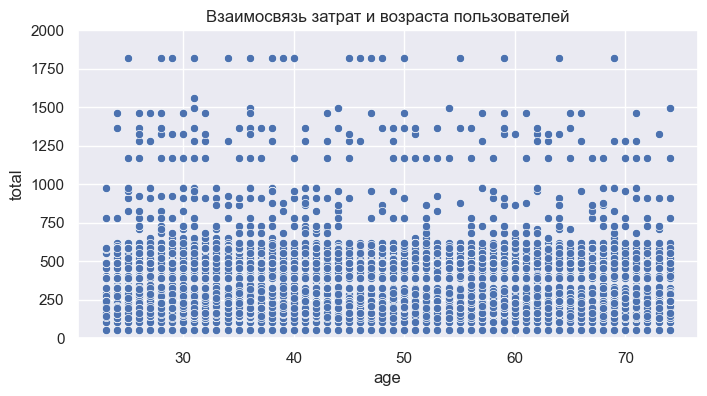

In [45]:
sns.scatterplot(data=df_1, x='age', y='total')
plt.title('Взаимосвязь затрат и возраста пользователей')
plt.axis(ymin = 0 , ymax = 2000)
plt.show()

In [46]:
# Гипотеза Н0: корреляция статистически незначима и связи между признаками нет.
# Гипотеза Н1: корреляция статистически значима и есть связь между признаками.
scipy.stats.spearmanr(df_1['total'], df_1['age'])

SignificanceResult(statistic=-0.00588354021018083, pvalue=0.3536809639017331)

**Выводы:**
1. По общей диаграмме рассеяния заметно, что сумма затрат не зависит от возраста пользователей. Траты пользователей распределены очень равномерно по всем значениям возраста.
2. Линейной связи между возрастом и затратами пользователей не обнаружена, о чем свидетельствует значение коэффициента кореляции Спирмена, а также результаты теста Спирмена на взаимосвязь признаков (p-value больше уровня значимости 0,05).

### 4.3.4. Взаимосвязь затрат (total) и пола пользователей (gender)

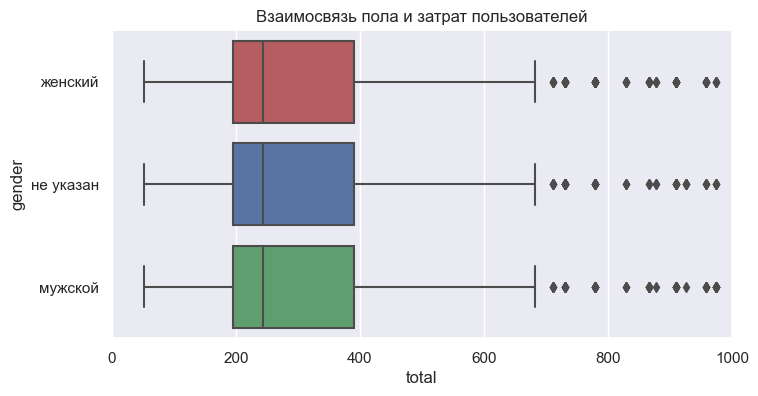

In [47]:
sns.boxplot(y='gender', x='total', data=df_1, palette=['r', 'b', 'g'])
plt.title('Взаимосвязь пола и затрат пользователей')
plt.axis(xmin = 0 , xmax = 1000)
plt.show()

In [48]:
# Гипотеза Н0: корреляция статистически незначима и связи между признаками нет.
# Гипотеза Н1: корреляция статистически значима и есть связь между признаками.
scipy.stats.spearmanr(df_1['total'], df_1['gender'])

SignificanceResult(statistic=-0.0014851322252403588, pvalue=0.8148978152428212)

**Выводы:**
1. На диаграмме боксплот заметно, что сумма затрат не зависит от пола пользователей.
2. Линейной связи между полом и затратами пользователей не обнаружено, о чем свидетельствует значение коэффициента кореляции Спирмена, а также результаты теста Спирмена на взаимосвязь признаков (p-value больше уровня значимости 0,05).

### 4.3.5. Расчет основных агрегированных количественных показателей в разрезе торговых точек

In [49]:
# расчет основных агрегированных показателей из df_1, сгруппированного по торговым точкам
df_outlet = df_1.groupby(['city', 'outlet_id'], as_index = False).\
agg({'transaction_id' : 'count', 'total' : 'sum', 'customer_id' : 'nunique'}).sort_values(by = 'total', ascending = False)
# новый столбец - средний чек для каждой торговой точки
df_outlet['avg_check'] = round(df_outlet['total'] / df_outlet['transaction_id'], 2) 
# новый столбец - доля в % каждой торговой точки в общем объеме продаж 
df_outlet['share_outlet'] = round(df_outlet['total'] / df_outlet['total'].sum() * 100, 2)
# новый столбец - среднее кол-во покупок для каждого уникального пользователя на разных торговых точках
df_outlet['cnt_per_client'] = round(df_outlet['transaction_id'] / df_outlet['customer_id'], 2)
# переименование столбцов
df_outlet = df_outlet.rename(columns = {'customer_id' : 'nunique_customer', 'transaction_id' : 'transaction_cnt'})
df_outlet

,city,outlet_id,transaction_cnt,total,nunique_customer,avg_check,share_outlet,cnt_per_client
0,москва,5,8545,2604307.55,944,304.78,34.98,9.05
2,санкт-петербург,3,8593,2515132.10,800,292.70,33.78,10.74
1,москва,8,7714,2326562.55,501,301.60,31.25,15.40


**Выводы:**
После группировки датасета в разрезе торговых точек и расчета основных агрегрованных показателей, можно сделать следующие выводы:   .
1. Кол-во транзакций (покупок), выручка распределяются между всеми тремя точками достаточно равномерно. Доля и вес каждой торговой точки в общей выручке близки друг к другу и составляют примерно 1/3 на каждую торговую точку. Средний чек также практически не отличается. Сбалансированное потребление, на первый взгляд, может говорить о том, что торговые точки обладают примерно одинаковыми ключевыми характеристиками: уровень сервиса, продуктовая линейка, маркетинговые стратегии, похожая локация и т.д.
2. Выявлена значительная разница в количестве уникальных клиентов для каждой торговой точки, так на торговой точке № 8 кол-во уникальных клиентов - 501 чел, в то время как на торговых точках: № 5 - 944 чел, № 3 - 800 чел. При этом кол-во повторных покупок (retention, коэффициент удержания клиентов) на торговой точке № 8 намного выше (на 50%), чем этот показатель на двух других точках. 
  
  В связи с этим, рекомендуется проанализировать ключевые характеристики торговых точек и выявить возможные причины столь большой разницы в retention, коэффициенте удержания клиентов.
  
  Возможные причины различий в кол-ве уникальных клиентов и повторных покупок:

1. Лояльность клиентов: Возможно, эта точка имеет устойчивую базу лояльных клиентов, которые часто возвращаются, но не привлекает новых.

2. Специальные предложения: Здесь могут действовать выгодные программы лояльности или специальные предложения, способствующие повторным покупкам.

3. Уникальные услуги: Точка может предлагать уникальные товары или услуги, которые удовлетворяют постоянных клиентов.

4. Локация и доступность: Точка может находиться в более удаленном месте, что снижает приток новых клиентов, но удобна для преданных клиентов.

5. Обслуживание: Высокое качество обслуживания может способствовать удовлетворенности постоянных клиентов, которые возвращаются.

Анализ этих факторов поможет объяснять разницу в количестве уникальных клиентов и повторных покупках.

### 4.3.6. Распределение кол-ва продаж (транзакций) по категориям в разрезе торговых точек

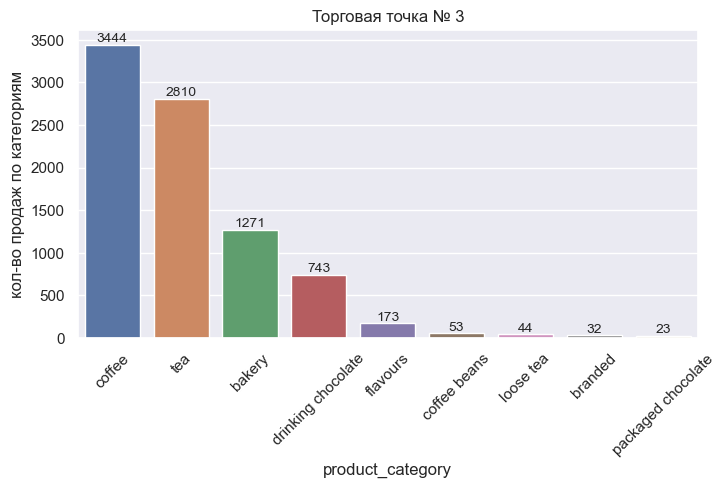

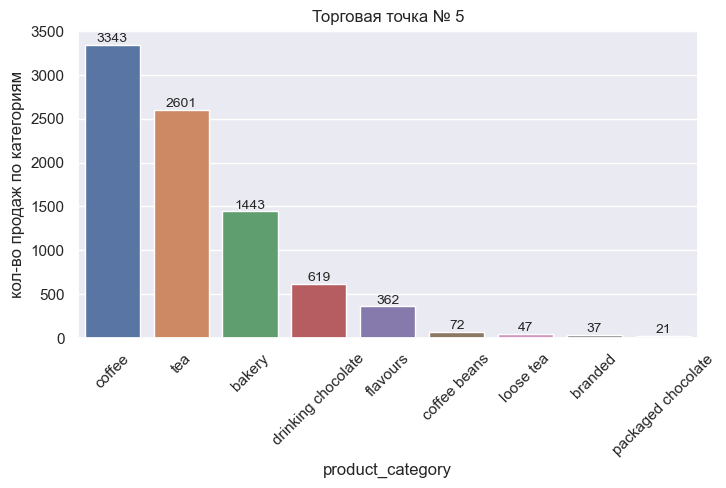

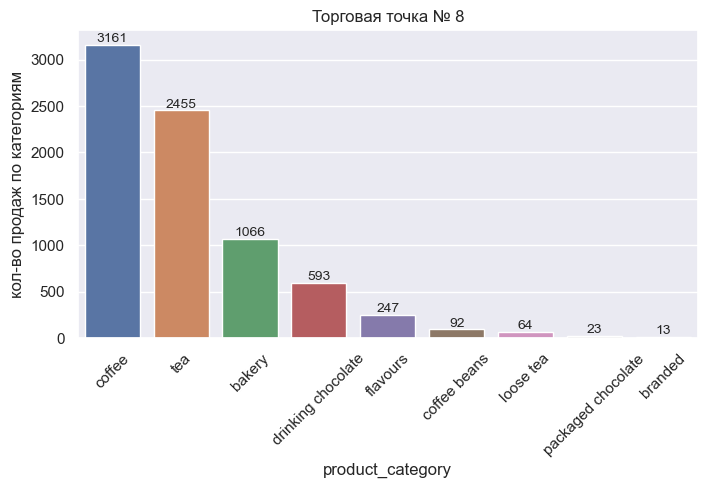

In [50]:
for i in df_1['outlet_id'].unique():
  df = df_1[df_1['outlet_id'] == i]

  categories = df['product_category'].value_counts()
  
  ax = sns.barplot(y=categories.values, x=categories.index, order = categories.index)
  ax.bar_label(ax.containers[0], fontsize=10)
  plt.title(f'Торговая точка № {i}')
  plt.ylabel('кол-во продаж по категориям')
  plt.xticks(rotation=45)
  plt.show()

**Выводы:**
1. "Рейтинг" распределения торговых категорий практически одинаков на всех трех торговых точках. Это может указывать на однородность целевой аудитории (схожие предпочтения клиентов), единую маркетинговую стратегию, единую ассортиментную линейку (на всех торговых точках), эффективное управление товарными запасами и т.д.

### 4.3.7. ТОП-10 самых высокочастотных и 10 самых низкочастотных товаров в разрезе торговых точек

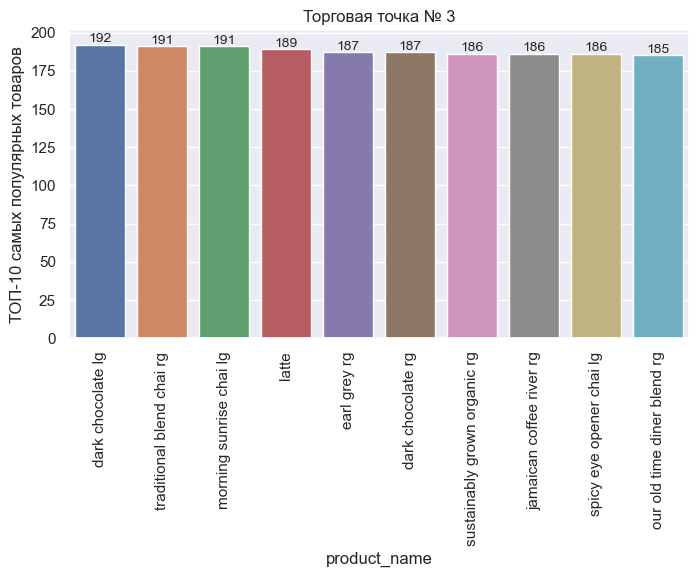

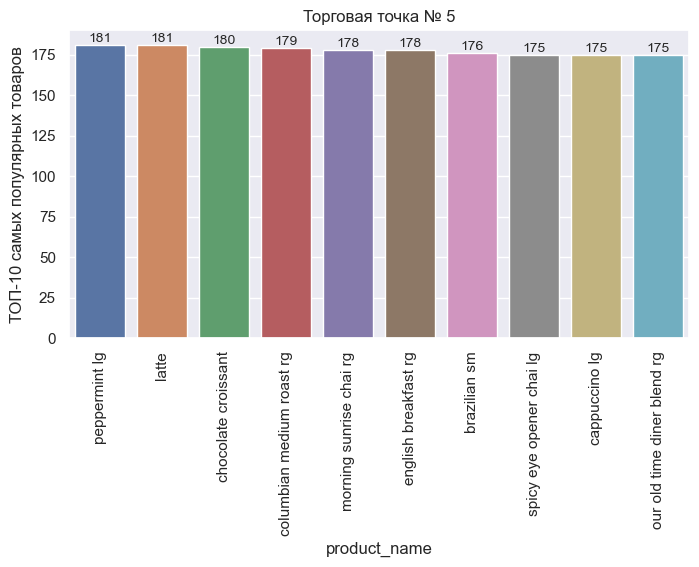

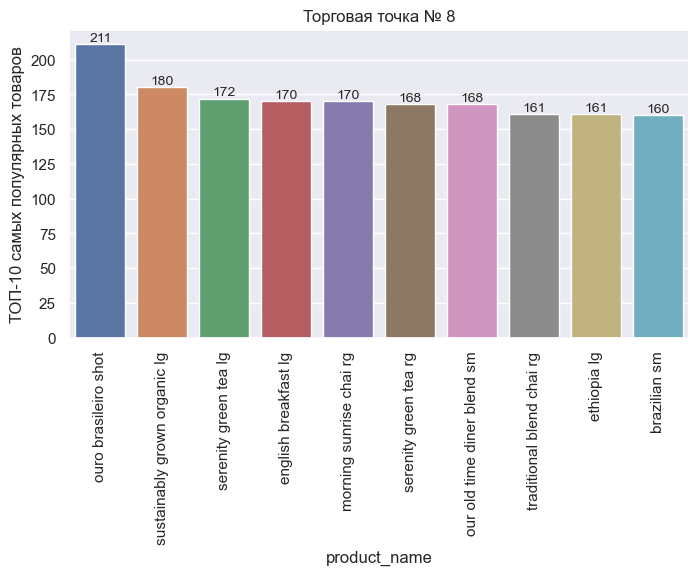

In [51]:
# ТОП-10 самых популярных товаров по каждой торговой точке
for i in df_1['outlet_id'].unique():
  df = df_1[df_1['outlet_id'] == i]

  products = df['product_name'].value_counts()[:10]
  
  ax = sns.barplot(y=products.values, x=products.index, order = products.index)
  ax.bar_label(ax.containers[0], fontsize=10)
  plt.title(f'Торговая точка № {i}')
  plt.ylabel('ТОП-10 самых популярных товаров')
  plt.xticks(rotation=90)
  plt.show()

In [52]:
# создадим три списка уникальных значений ТОП-10 товаров по каждой торговой точке:
top_3 = df_1[df_1['outlet_id'] == 3]['product_name'].value_counts().index[:10]
top_5 = df_1[df_1['outlet_id'] == 5]['product_name'].value_counts().index[:10]
top_8 = df_1[df_1['outlet_id'] == 8]['product_name'].value_counts().index[:10]

In [53]:
# поиск пересекающихся товаров (ТОП-10) в трех разных точках:
c = list(set(top_3) & set(top_5))
d = list(set(top_5) & set(top_8))
e = list(set(top_3) & set(top_8))
print(c) 
print(d)
print(e)   

['latte', 'spicy eye opener chai lg', 'our old time diner blend rg']
['morning sunrise chai rg', 'brazilian sm']
['traditional blend chai rg']


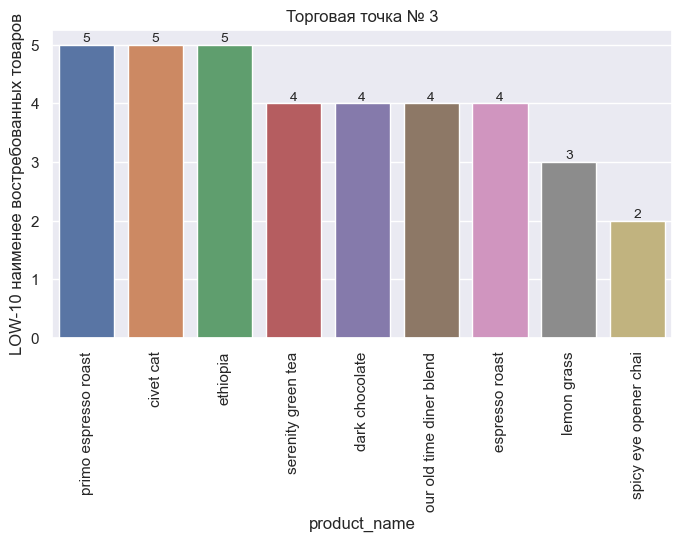

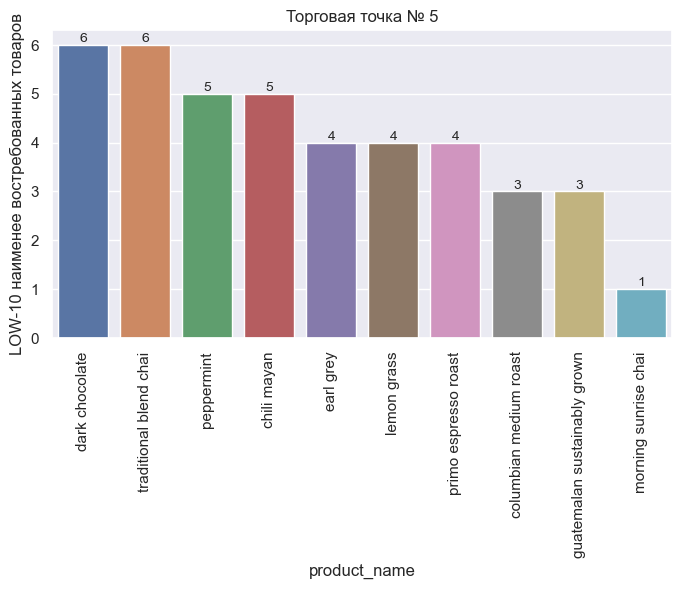

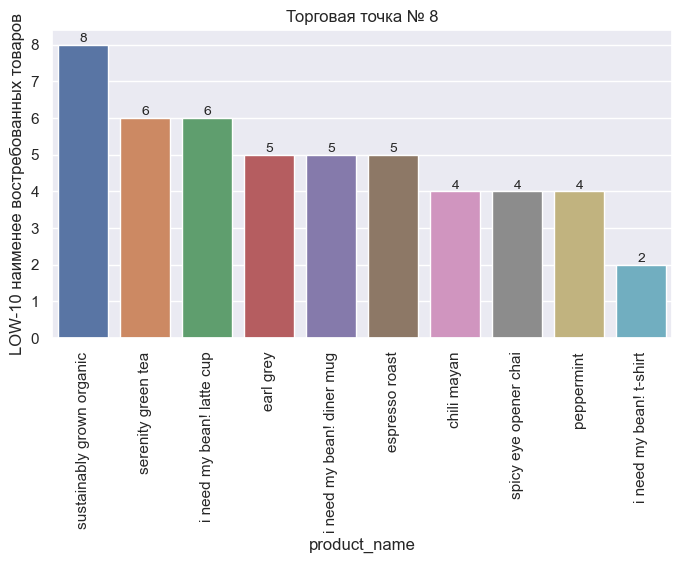

In [54]:
# LOW-10 наименее востребованных товаров по каждой торговой точке
for i in df_1['outlet_id'].unique():
  df = df_1[df_1['outlet_id'] == i]

  products = df['product_name'].value_counts()[70:]
  
  ax = sns.barplot(y=products.values, x=products.index, order = products.index)
  ax.bar_label(ax.containers[0], fontsize=10)
  plt.title(f'Торговая точка № {i}')
  plt.ylabel('LOW-10 наименее востребованных товаров')
  plt.xticks(rotation=90)
  plt.show()

In [55]:
# создадим три списка уникальных значений LOW-10 наименее востребованных товаров по каждой торговой точке:
low_3 = list(df_1[df_1['outlet_id'] == 3]['product_name'].value_counts().index[70:])
low_5 = df_1[df_1['outlet_id'] == 5]['product_name'].value_counts().index[70:]
low_8 = df_1[df_1['outlet_id'] == 8]['product_name'].value_counts().index[70:]

In [56]:
# поиск пересекающихся товаров (LOW-10) в трех разных точках:
c = list(set(low_3) & set(low_5))
d = list(set(low_5) & set(low_8))
e = list(set(low_3) & set(low_8))
print(c) 
print(d)
print(e)   

['dark chocolate', 'primo espresso roast', 'lemon grass']
['peppermint', 'earl grey', 'chili mayan']
['spicy eye opener chai', 'serenity green tea', 'espresso roast']


**Выводы:**
1. Несмотря на то, что "рейтинг" распределения торговых категорий практически одинаков на всех трех торговых точках, список ТОП-10 самых популярных и список LOW-10 самых невостребованных товаров (входящих в эти категории) разный для каждой торговой точки и содержит мало пересечений. Это может указывать на локальные предпочтения потребителей, адаптацию торговых точек под окружающую их конкурентную среду, корректировки ассортимента под текущие тенденции спроса.

### 4.3.8. Расчет основных агрегированных количественных показателей по каждой категории пола

In [57]:
# расчет основных агрегированных показателей из df_1, сгруппированного по категориям пола
df_gender = df_1.groupby(['gender'], as_index = False).\
agg({'transaction_id' : 'count', 'total' : 'sum', 'customer_id' : 'nunique'}).sort_values(by = 'total', ascending = False)
# новый столбец - средний чек для каждой категории пола
df_gender['avg_check'] = round(df_gender['total'] / df_gender['transaction_id'], 2) 
# новый столбец - доля в % каждой категории пола 
df_gender['share_gender'] = round(df_gender['customer_id'] / df_gender['customer_id'].sum() * 100, 2)
# новый столбец - доля в % каждой категории пола в общем обьеме продаж
df_gender['share_total'] = round(df_gender['total'] / df_gender['total'].sum() * 100, 2)
# новый столбец - доля в % каждой категории пола в кол-ве транзакций
df_gender['share_transaction'] = round(df_gender['transaction_id'] / df_gender['transaction_id'].sum() * 100, 2)
# новый столбец - среднее кол-во покупок для каждого уникального пользователя в каждой категории
df_gender['cnt_per_client'] = round(df_gender['transaction_id'] / df_gender['customer_id'], 2)
# переименование столбцов
df_gender = df_gender.rename(columns = {'customer_id' : 'nunique_customer', 'transaction_id' : 'transaction_cnt'})
df_gender

,gender,transaction_cnt,total,nunique_customer,avg_check,share_gender,share_total,share_transaction,cnt_per_client
0,женский,10851,3269635.2,976,301.32,43.47,43.91,43.66,11.12
1,мужской,8222,2454013.9,726,298.47,32.34,32.96,33.08,11.33
2,не указан,5779,1722353.1,543,298.04,24.19,23.13,23.25,10.64


**Выводы:**
После группировки датасета в разрезе разных категорий пола и расчета основных агрегированных показателей по каждой категории, можно сделать следующие выводы:
1. Если предположить, что уникальные клиенты, которые не указали пол, распределяются на мужчин и женщин примерно так же, как и клиенты, которые указали пол, то получим: ок 57% клиентов сети - женщины, ок 43% - мужчины. Такое соотношение мужчин и женщин является статистически подтвержденным в современной России. 
1. Кол-во транзакций (покупок), выручка распределяются между категориями пропорционально доле каждой категории. Средние чеки практически одинаковы и не зависят от категории. Кол-во повторных покупок (retention, коэффициент удержания клиентов) не зависит от пола. 

### 4.3.8. Расчет основных агрегированных количественных показателей по каждой категории возраста

In [58]:
# выделим 4 категории возраста и запишем в отдельный столбец датафрейма
def age_to_category(age):
    if age < 36:
        age_category = '23-35'
    elif age < 49:
        age_category = '36-48'
    elif age < 63:
        age_category = '49-62'
    else:
        age_category = '63-74'
    return age_category

In [59]:
df_1['age_category'] = df_1['age'].apply(age_to_category)
df_1.head(60)

,transaction_id,quantity,unit_price,total,product_id,product_name,product_category,outlet_id,city,customer_id,gender,age,age_category
0,0,1,162.50,162.50,52,traditional blend chai rg,tea,3,санкт-петербург,558,женский,41,36-48
1,1,2,227.50,455.00,27,brazilian lg,coffee,3,санкт-петербург,781,не указан,33,23-35
2,2,2,162.50,325.00,46,serenity green tea rg,tea,3,санкт-петербург,788,не указан,29,23-35
3,3,2,162.50,325.00,23,our old time diner blend rg,coffee,3,санкт-петербург,683,женский,25,23-35
4,4,1,159.25,159.25,34,jamaican coffee river sm,coffee,3,санкт-петербург,99,мужской,57,49-62
5,5,1,195.00,195.00,32,ethiopia rg,coffee,3,санкт-петербург,664,женский,28,23-35
6,6,2,195.00,390.00,49,english breakfast lg,tea,3,санкт-петербург,316,женский,72,63-74
7,7,1,243.75,243.75,60,sustainably grown organic rg,drinking chocolate,3,санкт-петербург,38,мужской,68,63-74
8,8,2,195.00,390.00,51,earl grey lg,tea,3,санкт-петербург,370,женский,65,63-74
9,9,2,195.00,390.00,49,english breakfast lg,tea,3,санкт-петербург,180,мужской,44,36-48


In [60]:
# расчет основных агрегированных показателей из df_1, сгруппированного по категориям возраста
df_age = df_1.groupby(['age_category'], as_index = False).\
agg({'transaction_id' : 'count', 'total' : 'sum', 'customer_id' : 'nunique'}).sort_values(by = 'total', ascending = False)
# новый столбец - средний чек для каждой категории возраста
df_age['avg_check'] = round(df_age['total'] / df_age['transaction_id'], 2) 
# новый столбец - доля в % каждой категории возраста 
df_age['share_age'] = round(df_age['customer_id'] / df_age['customer_id'].sum() * 100, 2)
# новый столбец - доля в % каждой категории возраста в общем обьеме продаж
df_age['share_total'] = round(df_age['total'] / df_age['total'].sum() * 100, 2)
# новый столбец - доля в % каждой категории возраста в кол-ве транзакций
df_age['share_transaction'] = round(df_age['transaction_id'] / df_age['transaction_id'].sum() * 100, 2)
# новый столбец - среднее кол-во покупок для каждого уникального пользователя в каждой категории
df_age['cnt_per_client'] = round(df_age['transaction_id'] / df_age['customer_id'], 2)
# переименование столбцов
df_age = df_age.rename(columns = {'customer_id' : 'nunique_customer', 'transaction_id' : 'transaction_cnt'})
df_age

,age_category,transaction_cnt,total,nunique_customer,avg_check,share_age,share_total,share_transaction,cnt_per_client
0,23-35,8226,2458000.35,736,298.81,32.78,33.01,33.10,11.18
1,36-48,6309,1890993.00,592,299.73,26.37,25.40,25.39,10.66
2,49-62,5542,1692458.30,496,305.39,22.09,22.73,22.30,11.17
3,63-74,4775,1404550.55,421,294.15,18.75,18.86,19.21,11.34


**Выводы:**
После группировки датасета в разрезе 4 категорий возраста и расчета основных агрегированных показателей по каждой категории, можно сделать следующие выводы:
1. Кол-во транзакций (покупок), выручка распределяются между категориями пропорционально доле каждой категории. Средние чеки практически равны и не зависят от категории. Кол-во повторных покупок (retention, коэффициент удержания клиентов) не зависит от категории возраста. 

# **5. Evaluation / Общие выводы и рекомендации**

## **I. Общие выводы по датасету:**

1. Был представлен датасет с выгрузкой о транзакциях, товарах, клиентах и торговых точках из CRM-системы Заказчика. Файл в формате csv, содержащий 24909 строк (объектов) и 6 столбцов (признаков).
2. Предобработка данных включала в себя: исключение нерелевантных признаков и наблюдений, полных дубликатов (ошибочно задвоенных записей), распаковку и форматирование данных, проверку признаков на наличие незаполненных значений, расчет дополнительных признаков.
3. По итогу предобработки сохранен преобразованный датасет для последующего анализа:
* датасет в разрезе уникальных транзакций (24852 объектов, 12 признаков): файл в формате csv (coffee_shop_prepared.csv).

## **II. Целевая аудитория и обобщенный портрет клиентов сети кофеен**

1. ***Возраст и половая принадлежность:***
* Минимальное значение возраста клиентов - 23 года, максимальное - 74 года. Размах значений составил 51 год.
* Средний возраст клиента - 46 лет, а медианное значение - 43 года.
* Возраст 25% клиентов не превышает 32 лет, а 75% клиентов - 59 лет, что свидетельствует о том, что услугами данной сети пользуются, в основном, молодежь и люди среднего возраста (по российским стандартам).
* По итогу разделения возраста клиентов на 4 категории, стало очевидно, что больше всего клиентов в категории 23-35 лет (33%), далее в категории 36-48 лет (26%), 49-62 лет (22%). В категории 63-74 лет - 19% пользователей.
* Такое распределение клиентов по возрастным группам может указывать на несколько факторов:
- Молодежная аудитория более активно пользуется услугами данной сети кофеен, возможно, благодаря современным трендам и культурным предпочтениям.
- Более зрелые клиенты менее заинтересованы в посещении кофеен, либо предпочитают альтернативные форматы питания и отдыха (снижение интереса с возрастом к подобному формату).
* Среди посетителей сети кофеен около 57% женщин и 43% мужчин. Такое соотношение мужчин и женщин является статистически подтвержденным в современной России. Таким образом, можно сделать вывод об отсутствии значимой взаимосвязи между полом и предпочтениями клиентов сети кофеен.
* Медианное значение возраста мужчин составляет 46 лет, а женщин 44 года.
* По итогам проведенного анализа можно сделать выводы, что такие статистические показатели, как кол-во повторных покупок на каждого уникального клиента (Retention, коэффициент удержания клиентов), средний чек (внутри каждой категории) не зависят от категории пола и возраста.
* Так, средний чек (в разрезе категорий по полу и возрасту) равен - 300 руб, кол-во покупок на каждого уникального клиента - 11 шт.
* Выручка распределяется равномерно между категориями по полу и возрасту пропорционально доле каждой категории.

## **II. Распределение продаж по сети кофеен**

1. ***Распределение основных показателей продаж по всей сети кофеен:***
* Минимальная сумма чека в общей выборке - 52 руб, максимальная сумма - 23 400 руб. Размах значений составил 23 348 руб. Среднее значение чека по всей выборке составило 300 руб, а медианное - 244 руб. 
* 25% всех чеков не превышает 195 руб, а 75% чеков - 390 руб, что свидетельствует о наличии большого количества чеков с небольшими суммами и малого количества чеков с большими суммами.
* В ассортименте сети кофеен 80 уникальных наименований товаров, входящих в 9 уникальных торговых категорий.
* Выручка по категориям товаров распределяется неравномерно. Самая популярная (наиболее часто продаваемая) продуктовая категория - coffee - 40% всей выручки за анализируемый период. 
* Две лидирующие категории - coffee и tea составляют 69 % от общего обьема продаж. 
* В ТОП-4 категорий входят: coffee, tea, bakery, drinking chocolate. В совокупности ТОП-4 категории дают 92% от всей выручки.
* Самый популярный (наиболее часто продаваемый) товар - morning sunrise chai rg (категория tea), который продавался 521 раз за анализируемый период. 
* LOW-5 остальных категорий (flavours, coffee beans, loose tea, branded, packaged chocolate) в совокупности дают всего 8% выручки. Товары из LOW-5 категорий не являются товарами-аутсайдерами, их целесообразно рассматривать как сопутствующие товары т.к. они стимулируют спрос на основные товары, способствуют улучшению клиентской удовлетворенности, что в конечном итоге влияет на лояльность покупателей. 

2. ***Распределение основных показателей продаж по сети в разрезе торговых точек:***

В сети три уникальных торговых точки, две из них в Москве - №5, №8, одна в СПб - №3.<br>

После группировки датасета в разрезе торговых точек и расчета основных агрегрованных показателей, можно сделать следующие выводы:   
* Кол-во транзакций (покупок), так же как и выручка распределяются между всеми тремя точками достаточно равномерно. Доля и вес каждой торговой точки в общей выручке близки друг к другу и составляют примерно 1/3 на каждую торговую точку. 
* Средний чек также практически не отличается и находится в диапазоне 293 - 305 руб. 
* Сбалансированное потребление, на первый взгляд, может говорить о том, что торговые точки обладают примерно одинаковыми ключевыми характеристиками: уровень сервиса, продуктовая линейка, ценовая политика, маркетинговые стратегии, похожая локация и т.д.
* Выявлена значительная разница в количестве уникальных клиентов для каждой торговой точки, так на торговой точке № 8 (Москва) кол-во уникальных клиентов - 501 чел, в то время как на торговых точках: № 5 (Москва) - 944 чел, № 3 (СПб) - 800 чел. 
* При этом кол-во повторных покупок на одного уникального клиента (retention, коэффициент удержания клиентов) на торговой точке № 8 намного выше (на 50%) и составляет 15 ед., чем этот показатель на двух других точках, на №5 - 9 ед., на №3 - 11 ед. 

В связи с этим, рекомендуется проанализировать ключевые характеристики торговых точек и выявить возможные причины столь большой разницы в показателях (кол-во уникальных клиентов, retention).

Возможные причины:

* Лояльность клиентов: Возможно, эта точка имеет устойчивую базу лояльных клиентов, которые часто возвращаются, но не привлекает новых.
* Специальные предложения: Здесь могут действовать выгодные программы лояльности или специальные предложения, способствующие повторным покупкам.
* Уникальные услуги: Точка может предлагать уникальные товары или услуги, которые удовлетворяют постоянных клиентов.
* Локация и доступность: Точка может находиться в более удаленном месте, что снижает приток новых клиентов, но удобна для преданных клиентов.
* Обслуживание: Высокое качество обслуживания может способствовать удовлетворенности постоянных клиентов, которые возвращаются.

Анализ этих факторов поможет объяснять разницу в кол-ве уникальных клиентов и повторных покупках.

* Распределение выручки по торговым категориям практически одинаково для всех трех торговых точек и совпадает с распределением выручки по торговым категориям в общем по сети. Это может указывать на однородность целевой аудитории на разных торговых точках (схожие предпочтения клиентов), единую маркетинговую стратегию, единую ассортиментную линейку (на всех торговых точках), эффективное управление товарными запасами и т.д.
* Несмотря на то, что распределение выручки по торговым категориям практически одинаково для всех трех торговых точек, список ТОП-10 самых популярных (наиболее часто продаваемых) и список LOW-10 самых редко продаваемых товаров, разный для каждой торговой точки и содержит мало пересечений по товарам. 
* Это может указывать на локальные предпочтения потребителей, адаптацию торговых точек под окружающую их конкурентную среду, корректировки ассортимента под текущие тенденции спроса.

## **IV. Рекомендации:**

1. Поскольку молодые люди являются основными клиентами сети, это может стать ориентиром для дальнейшего развития текущего бизнеса и при открытии новых торговых точек. В таком случае можно рекомендовать мероприятия следующего направления: 
- поддержание и развитие молодежной атмосферы в оформлении пространства торговых точек, 
- развитие молодежного меню в текущих трендах (вегетарианские, безглютеновые продукты), 
- маркетинг в соцсетях (конкурсы, акции), ориентированный на молодежь 
- программы лояльности (клубные/подарочные карты, мобильные приложения с акциями)<br>

2. Т.к. мы знаем дни рождения наших клиентов, можно предложить мероприятия, которые помогут укрепить связь с клиентами и повысить их лояльность: 

- бесплатный напиток или десерт в день рождения, 
- система скидок (например, 20%) на всё меню в день рождения или в течение недели после, 
- клубные/подарочные карты с фиксированной суммой, которые можно дарить друзьям на день рождения,
- конкурсы в соцсетях с призами, связанными с днями рождения 

3. Следует обратить внимание на категории сопутствующих товаров :

- Flavours - вкусы (ароматизаторы, добавки для кофе)
- Coffee beans - Кофейные зерна
- Loose tea - Рассыпной чай
- Branded - Брендированные товары (продукция с известными марками)
- Packaged chocolate - Упакованный шоколад

Их совокупная доля в общем обьеме продаж (8%) очень мала и отличается от среднестатистической в аналогичных случаях (10-30%).

На что обратить внимание:

- увеличение ассортимента сопутствующих товаров. Выявлен недостаточный  ассортимент категорий сопутствующих товаров, в частности flavors – всего 4 уникальных товара, branded – всего 3, packaged chocolate – всего 3.  Ограниченный выбор или отсутствие популярных товаров может усугублять ситуацию.  
- анализ цен и предложений конкурентов на эти категории. Высокие цены на сопутствующие продукты могут отталкивать клиентов, анализ предложений в этих категориях у конкурентов может выявить точки роста.
- обслуживание. Качество обслуживания может влиять на желание клиентов покупать дополнительные товары, обучение персонала для лучшего предложений дополнительных товаров
- продвижение брендированных товаров (категория branded)